# TTTR files

## Reading

A TTTR file usually containts meta data stored in a header and a set of events that can for instance represent a set of sequentially detected photons. TTTR files are read by the `tttrlib` module which first needs to be imported.

In [26]:
import tttrlib

Next, a TTTR object needs to be constructed. The TTTR object constructor can read the content of a tttr 
file. For that, the file name needs to be passed to the constructure. Moreover, the file type needs 
to be either provided or needs to be inferable. The file type is either specified by a number or by passing a 
string to the TTTR object's constructor.

In [27]:
ptu = tttrlib.TTTR('./tttr-data/pq/ptu/pq_ptu_hh_t3.ptu', 0)     #  i) specify type by ID
ptu = tttrlib.TTTR('./tttr-data/pq/ptu/pq_ptu_hh_t3.ptu', 'PTU') # ii) specify type by name

File types, identifier and and the corresponding names are listed below. File types that where the reading routine needs to be specified are marked with an x.

<figure><figcaption><b>Table</b> of supported file types and corresponding identifiers</figcaption> 

| File type                | Number | Identifier     | Required
|--------------------------|--------|----------------|---------
|PicoQuant, PTU            |0       |'PTU'           | -
|PicoQuant, HT3            |1       |'HT3'           | -
|Becker&Hickl, SPC130      |2       |'SPC-130'       | x
|Becker&Hickl, SPC630-256  |3       |'SPC-630-256'   | x
|Becker&Hickl, SPC630-4096 |4       |'SPC-630-4096'  | x
|Photon-HDF5               |5       |'PHOTON-HDF5'   | - 

</figure>


A TTTR file represents a collection of events with corresponding event records. Different file types use different encodings for events and require thus different reading routines.



| Record type               | Number | Supported container |
|----|----|----|
|PQ_RECORD_TYPE_HHT2v2      |1       |PTU, HT2           |
|PQ_RECORD_TYPE_HHT2v1      |2       |PTU, HT2           |
|PQ_RECORD_TYPE_HHT3v1      |3       |PTU, HT3           |
|PQ_RECORD_TYPE_HHT3v2      |4       |PTU, HT3           |
|PQ_RECORD_TYPE_PHT3        |5       |PTU, HT3           |
|PQ_RECORD_TYPE_PHT2        |6       |PTU, HT2           |
|BH_RECORD_TYPE_SPC130      |7       |SPC                |
|BH_RECORD_TYPE_SPC600_256  |8       |SPC                |
|BH_RECORD_TYPE_SPC600_4096 |9       |SPC                |


For certain file types details on the TTTR record types can be determined the record type can be infered. Such files can be read without providing the type.

In [24]:
ptu = tttrlib.TTTR('./tttr-data/pq/ptu/pq_ptu_hh_t3.ptu')        #  iii) infer type

Other file types require to specify the reading routing, as different file types use the same 
file ending and the file type cannot be infered. A TTTR object that contains the data in a TTTR file can be 
initialized by the filename and the data type as specified in above. Both Alternatively, TTTR objects are initialized 
by the filename and the file type identifier as displayed in the table above. Both approaches are equivalent and 
demonstrated for the Becker&Hickl SPC-130 and the PicoQuant PTU file supplied in the example folder in the Python 
code below. If the container type is not specified `tttrlib` will try to infer the container type based on the 
file extension.

SPC files require information on the file type.

In [25]:
spc132 = tttrlib.TTTR('./tttr-data/bh/bh_spc132.spc', 2)
spc132 = tttrlib.TTTR('./tttr-data/bh/bh_spc132.spc', 'SPC-130')

TTTR objects can be also be created withou data. On application for empty `TTTR` container are cases where
multiple experiments are integrated / combined.

# Header

Example how to read and write header

# Operations

In [ ]:
import tttrlib 
data = tttrlib.TTTR('./tttr-data/bh/bh_spc132.spc', 'SPC-130')

## Slicing

New TTTR objects can be created by slicing existing objects, if you are
interested a subset of the data.

In [23]:
import tttrlib 
data = tttrlib.TTTR('./tttr-data/bh/bh_spc132.spc', 'SPC-130')
data_sliced = data[:10]

print("Number of events in file:", len(data))
print("Number of events in selection:", len(data_sliced))

Number of events in file: 183657
Number of events in selection: 10


A slice of a ``TTTR`` object creates a copy, i.e., the routing channel, the
macro, and the micro times are copied including the header information.

## Joining TTTRs
`TTTR` objects can be joined either by the append method or by using the `+`
operator.

In [ ]:
data = tttrlib.TTTR('./tttr-data/bh/bh_spc132.spc', 'SPC-130')
d2 = data.append(
    other=data,
    shift_macro_time=True,
    macro_time_offset=0
)

In [ ]:
d3 = data + data
len(d2) == 2 * len(data)
len(d3) == len(d2)

If ``shift_macro_time`` is set to True, which is the default, the macro times of the
data that are offset by the last macro time record in the first set in addition to
the value specified by ``macro_time_offset``. The parameter ``macro_time_offset``
is set to zero by default.

By appending TTTR objects to each other data that is splitted into multiple files
can be joined into a single TTTR object as follows

In [ ]:
import os
files = glob.glob('./data/bh/bh_spc132_smDNA/*.spc')
sorted(glob.glob('*.spc'), key=os.path.getmtime)
data = tttrlib.TTTR(files[0], 'SPC-130')
for d in files[1:]:
    data.append(tttrlib.TTTR(d, 'SPC-130'))

> In practice, take care that the files are ordered. The code above stiches the objects in the order as returned by the `glob` module. The glob module finds all the pathnames matching a specified pattern according to the rules used by the Unix shell, although results are returned in arbitrary order. Hence, we sort the data by creating time first. In case you need another ordering, e.g., lexical ordering adapt the code.

In [ ]:
shift_macro_time

get_used_routing_channels

## Attributes

## Microtime histograms

In [16]:
import tttrlib 
import matplotlib.pylab as plt

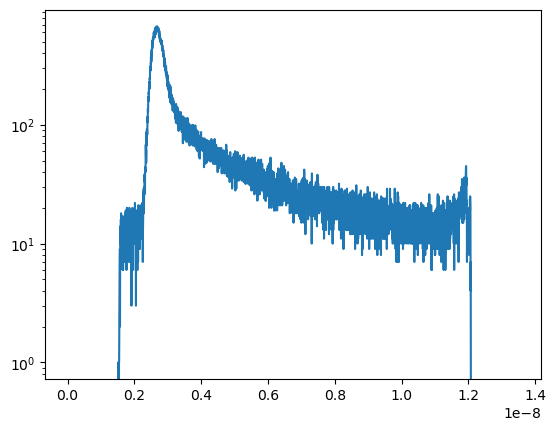

In [17]:
data = tttrlib.TTTR('./tttr-data/bh/bh_spc132.spc', 'SPC-130')
y, x = data.microtime_histogram
plt.semilogy(x, y)

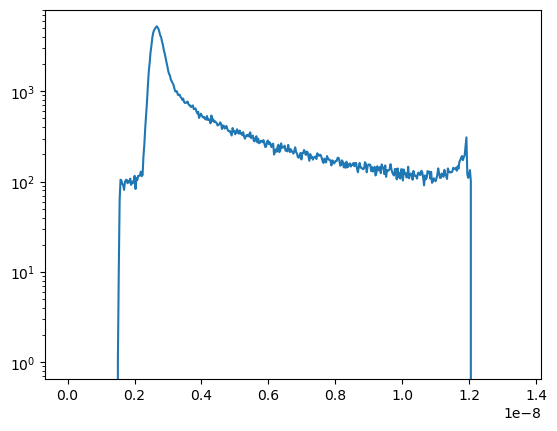

In [18]:
y, x = data.get_microtime_histogram(8)
plt.semilogy(x, y)



Selections
==========
A defining feature of TTTR data is that subsets can be selected and defined for
more detailed analysis. This is for instance exploited in single-molecule experimetns
There are different methods to access subsets of a TTTR object that are described
in this section.

Using selections
----------------
There is a set of functions and methods to select subsets of TTTR objects.
Beyond the the array processing capabilities either provided by the high-level
programming language or an library like `NumPy <http://www.numpy.org/>`_, ``tttrlib``
offers a set of functions and methods to select a subset of the data contained
in a TTTR file. There are two options to get selection for a subset of the data

    1. By *ranges*
    2. By *selection*

*Ranges* are lists of tuples marking the beginning and the end of a range.
*Selections* are list of integers, where the integers refer to the indices
of the event stream that was selected.


For instance, for the sequence of time events displayed in the following table

+--------+---+---+---+---+---+---+---+---+---+---+
|index   |0  |1  |2  |3  |4  |5  |6  |7  |8  |9  |
+--------+---+---+---+---+---+---+---+---+---+---+
|time    |1  |12 |13 |14 |15 |18 |20 |23 |30 |32 |
+--------+---+---+---+---+---+---+---+---+---+---+

the selection (1, 3, 5, 7) yields::

    12, 14, 18, 23

and the ranges (0, 2) and (7, 9) yield::

    (1, 12, 13), (23, 30, 32)

Depending on the specific application either ranges or selections are more useful.
For instance, single molecule bursts are usually defined by *ranges*, while detection
channels are usually selected by *selections*.

Channel selections
------------------
A very typical use case in TCSPC experiments (either in fluorescence lifetime
microscopy (FLIM) or multiparameteric fluorescence detection (MFD)) is to select
a subset of the registered events based on the detection channel. The experimental
example data provided by the file ``./examples/bh/bh_spc132.spc`` four detectors
were used to register the fluorescence signal with two polarizations in a 'green'
and 'red' spectral range. In the example file the detector numbers for the green
fluorescence were (0, 8) and (1, 9) for the red detection window.

The method 'get_selection_by_channel' provides an array that contains the indices
of the events when a the channel equals the channel number of the provided
arguments. To obtain the indices where the channel number. In the example below
the indices of the green (channel = 0 or channel = 8) and the indeces of the red
(channel = 1 or channel = 9) are saved in the variables ``green_indices``  and
``red_indices``, respectively.

.. code-block:: python

    import numpy as np
    import tttrlib

    data = tttrlib.TTTR('./examples/bh/bh_spc132.spc', 'SPC-130')

    green_indices = data.get_selection_by_channel([0, 8])
    red_indices = data.get_selection_by_channel([1, 9])

This examples needs to be adapted to the channel assignment dependent on the actual
experimental setup.

Selections can be made by channel with such a selection a new `TTTR` object can
be created.

.. code-block:: python

        data = tttrlib.TTTR('./data/bh/bh_spc132.spc', 'SPC-130')
        ch1_indeces = data.get_selection_by_channel([8])
        data_ch1 = tttrlib.TTTR(data, ch1_indeces)
        # alternatively
        data_ch1 = data[ch1_indeces]

The `TTTR` object can be operated on normally.

Count rate selections
---------------------
Another very common selection is based on the count rate. The count rate is
determined by the number of detected events within a given time window. The
selection by the method ``get_selection_by_count_rate`` returns all indices where
less photons were detected within a specified time window. The time window is
given by the number of macro time steps.

.. code-block:: python

    import numpy as np
    import tttrlib
    data = tttrlib.TTTR('./examples/bh/bh_spc132.spc', 'SPC-130')
    cr_selection = data.get_time_window_ranges(1, 30)

In the example shown above, the time window is 1200000 and 30 is the maximum
number of photons within that is permitted in a time window.

Such count rate selections are for instance used to detect bursts in single molecule
experiments or to generate filters for advanced FCS analysis :cite:`laurence2004`
(see also :ref:`Correlation:Count rate filer` and :ref:`Single Molecule:Burst selection`).



TTTR ranges
===========

Compute mean fluorescence lifetimes
shift_macro_time
get_used_routing_channels
Compute mean fluorescence lifetimes

## Writing TTTR-files

TTTR objects can be writen to files using the method `write` of TTTR objects.

```python
    import tttrlib
    data = tttrlib.TTTR('./data/bh/bh_spc132.spc', 'SPC-130')
    data_sliced = data[:10]
    output = {
        'filename': 'sliced_data.spc'
    }
    data_sliced.write(**output)
```

This way, as shown above, data can be sliced into pieces or converted into other
data types.

In [2]:
import tttrlib
import json
data = tttrlib.TTTR('./tttr-data/bh/bh_spc132.spc', 'SPC-130')
header = data.header
header.tttr_container_type = 0 # PTU
header.tttr_record_type = 4 # PQ_RECORD_TYPE_HHT3v2
header_dict = {
    "tags": [
        {"name": "MeasDesc_BinningFactor",
         "idx": -1,
         "type": 268435464,
         "value": 1
         },
        {"name": "TTResultFormat_BitsPerRecord",
         "idx": -1,
         "type": 268435464,
         "value": 1
         },
        {
            "idx": -1,
            "name": "MeasDesc_Resolution",
            "type": 536870920,
            "value": 3.2958984375e-12
        },
        {
            "idx": -1,
            "name": "MeasDesc_GlobalResolution",
            "type": 536870920,
            "value": 1.35e-08
        },
        {
            "idx": -1,
            "name": "TTResultFormat_BitsPerRecord",
            "type": 268435464,
            "value": 32
        },
        {
            "idx": -1,
            "name": "TTResultFormat_TTTRRecType",
            "type": 268435464,
            "value": 0x00010304 # rtHydraHarpT3
        }
    ]
}

In [3]:
header.json = json.dumps(header_dict)

In [ ]:
ptu_file = 'spc_data_converted.ptu'
data.write(ptu_file)

In [4]:
data_ptu = tttrlib.TTTR(ptu_file)

NameError: name 'ptu_file' is not defined

A TTTR object that was created for instance from a SPC file can be saved as PTU
file. For that the header information from a PTU file need to be provided when
writing to a file.

When a TTTR file is writen to another format certain meta data need to be provided. The combination of tttr_container_type and tttr_record_type determines of the header determines the ouput format of the TTTR writer method.

For PTU files at least the instrument and the measurement mode (T2, T3) need to be provided.

```cpp
#define rtPicoHarpT3     0x00010303    // (SubID = $00 ,RecFmt: $01) (V1), T-Mode: $03 (T3), HW: $03 (PicoHarp)
#define rtPicoHarpT2     0x00010203    // (SubID = $00 ,RecFmt: $01) (V1), T-Mode: $02 (T2), HW: $03 (PicoHarp)
#define rtHydraHarpT3    0x00010304    // (SubID = $00 ,RecFmt: $01) (V1), T-Mode: $03 (T3), HW: $04 (HydraHarp)
#define rtHydraHarpT2    0x00010204    // (SubID = $00 ,RecFmt: $01) (V1), T-Mode: $02 (T2), HW: $04 (HydraHarp)
#define rtHydraHarp2T3   0x01010304    // (SubID = $01 ,RecFmt: $01) (V2), T-Mode: $03 (T3), HW: $04 (HydraHarp)
#define rtHydraHarp2T2   0x01010204    // (SubID = $01 ,RecFmt: $01) (V2), T-Mode: $02 (T2), HW: $04 (HydraHarp)
#define rtTimeHarp260NT3 0x00010305    // (SubID = $00 ,RecFmt: $01) (V2), T-Mode: $03 (T3), HW: $05 (TimeHarp260N)
#define rtTimeHarp260NT2 0x00010205    // (SubID = $00 ,RecFmt: $01) (V2), T-Mode: $02 (T2), HW: $05 (TimeHarp260N)
#define rtTimeHarp260PT3 0x00010306    // (SubID = $00 ,RecFmt: $01) (V1), T-Mode: $02 (T3), HW: $06 (TimeHarp260P)
#define rtTimeHarp260PT2 0x00010206    // (SubID = $00 ,RecFmt: $01) (V1), T-Mode: $02 (T2), HW: $06 (TimeHarp260P)
#define rtMultiHarpNT3   0x00010307    // (SubID = $00 ,RecFmt: $01) (V1), T-Mode: $02 (T3), HW: $07 (MultiHarp150N)
#define rtMultiHarpNT2   0x00010207    // (SubID = $00 ,RecFmt: $01) (V1), T-Mode: $02 (T2), HW: $07 (MultiHarp150N)
```

The types of the meta data follows the PTU file convention.

```cpp
#define tyEmpty8      0xFFFF0008
#define tyBool8       0x00000008
#define tyInt8        0x10000008
#define tyBitSet64    0x11000008
#define tyColor8      0x12000008
#define tyFloat8      0x20000008
#define tyTDateTime   0x21000008
#define tyFloat8Array 0x2001FFFF
#define tyAnsiString  0x4001FFFF
#define tyWideString  0x4002FFFF
#define tyBinaryBlob  0xFFFFFFFF
```

Writing manually correct and functional header files can be tedious. Hence tttrlib
offers the option to use header information and headers of other TTTR files.

```python
import tttrlib
data = tttrlib.TTTR('./data/bh/bh_spc132.spc', 'SPC-130')
ptu_header = tttrlib.TTTRHeader('./data/pq/pq_ptu_hh_t3.ptu')
output = {
    'filename': 'spc_data_converted.ptu',
    'header': ptu_header
}
data.write(**output)
```


> The different TTTR container formats are not fully compatible. Hence, it can
happen that certain information that is for instance stored in the header is
lost when converting and saving data. For instance, BH 130 SPC files can hold
up to 4096 micro time channels, while PQ-PTU files hold up to 32768 micro time
channels.
